# Elderly Motion Analytics for Fall Prevention

## **Introduction**  

In this project, I will perform **Simple Binomial Logistic Regression** to analyze the relationship between vertical acceleration and the likelihood of a person lying down. Logistic regression is a powerful statistical method for modeling binary outcomes, making it ideal for this classification task. I will explore the dataset through **Exploratory Data Analysis (EDA)**, assess key **logistic regression assumptions**, and build a predictive model to determine how changes in vertical acceleration influence lying-down behavior.  

The analysis will include **coefficient interpretation**, **odds ratio calculation**, and **model evaluation** using metrics such as accuracy, precision, recall, F1 Score and AUC-ROC curves. Additionally, I will implement **cross-validation** and **error analysis** to ensure robustness and interpretability. Finally, I will discuss practical implications, limitations, and potential improvements to enhance predictive performance. This project aims to demonstrate how logistic regression can be applied to real-world classification problems while following best practices in model development and evaluation.

## **Overview**

This project investigates the relationship between vertical acceleration and lying down behavior in older adults using binomial logistic regression in Python. The goal is to determine how changes in vertical acceleration predict the likelihood of a person lying down, with potential applications in fall detection and health monitoring systems.

To guide this process, I follow the standard **Regression Modeling Workflow**—a four-stage cycle of planning, analyzing, constructing, and executing, as illustrated below:

|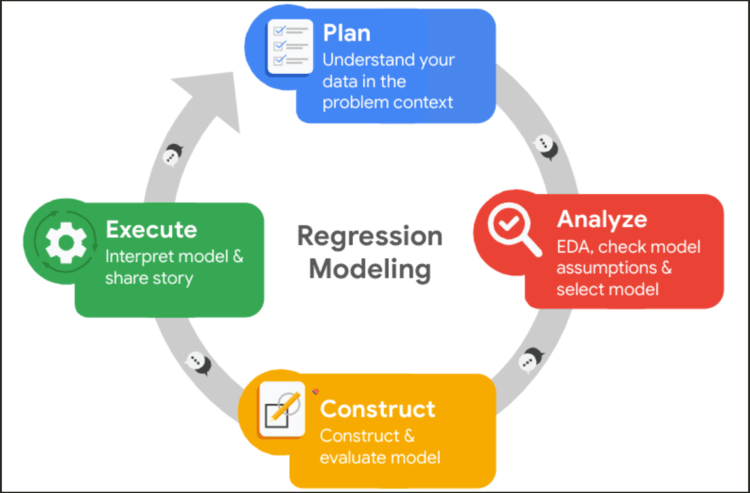 |  
|-----------------------------------| 

To achieve this, I will:

- **Perform Exploratory Data Analysis (EDA):** Examine the distribution of vertical acceleration and its relationship with lying down status using descriptive statistics and visualizations like boxplots and logistic regression plots, while also assessing class balance (lying down vs. not lying down) to identify potential biases in the dataset.  
- **Conduct Data Preprocessing:** Handle missing values (if present) to ensure data quality and split the dataset into training and holdout samples for model validation.  
- **Check Logistic Regression Assumptions:** Verify the binary nature of the outcome variable, ensure independence of observations and absence of multicollinearity, assess linearity between the independent variable (vertical acceleration) and log odds of lying down, and detect and address outliers that may skew model performance.  
- **Build and Interpret the Logistic Regression Model:** Train the model using the training dataset and extract coefficients (log odds), exponentiate coefficients to derive odds ratios for intuitive interpretation, and calculate confidence intervals for coefficients to quantify uncertainty.  
- **Visualize the Model:** Plot the logistic curve with a 95% confidence band to illustrate the relationship between vertical acceleration and lying down probability.  
- **Evaluate Model Performance:** Construct a confusion matrix to quantify true/false positives/negatives, compute metrics like accuracy, precision, recall, F1 score, and log loss, generate ROC curves and calculate AUC to assess discriminative power, and perform cross-validation to check model generalizability.  
- **Prepare for Deployment:** Serialize the trained model using `pickle` for future use and create a prediction function to classify new acceleration data.  
- **Summarize Findings and Recommendations:** Highlight key insights, discuss limitations, and suggest improvements.  

By executing this workflow, I aim to demonstrate how logistic regression can translate motion sensor data into actionable insights for elderly care, such as detecting inactivity or potential falls. The results could inform the development of wearable health monitors or assistive technologies.

## **Dataset Structure**

### **Activity Dataset**  
This dataset contains accelerometer readings used to detect whether an individual is lying down or not. It supports the development of models that classify body posture based on motion data.

#### **Dataset: Activity**  
This dataset includes the following features:

- **Acc (vertical)**: The vertical acceleration measured by an accelerometer, typically in meters per second squared (m/s²).  
- **LyingDown**: A binary indicator where `1` represents that the person is lying down and `0` indicates otherwise.

This dataset will be used to **analyze the relationship between vertical acceleration and body position, and to build classification models for posture detection.**

### **Importing Required Libraries**

Before beginning the analysis, I import the essential Python libraries that support data manipulation, visualization, and machine learning model development. These libraries provide the core functionality for handling structured data, building classification models, and evaluating performance.

### **Library & Package Versions**  
Maintaining consistent library versions ensures **reproducibility, stability, and compatibility** throughout the workflow. The following versions were used in this project:

- **Pandas:** 2.2.3  
- **NumPy:** 2.2.4  
- **Seaborn:** 0.13.2  
- **Matplotlib:** 3.10.1  
- **Statsmodels:** 0.14.4
- **Scikit-learn:** 1.6.1  


### **Imports and Setup**

**Core Data Handling**
- `pandas` for manipulating tabular data using DataFrames.  
- `numpy` for numerical computations and array operations.

**Data Visualization**
- `seaborn` for statistical data visualization with built-in themes and tools.  
- `matplotlib.pyplot` for general-purpose plotting.

**Statistical Modeling**  
- `statsmodels.api` for classical statistical modeling, including logistic regression, and for access to p-values and confidence intervals.

**Machine Learning and Evaluation**
- `train_test_split` from `sklearn.model_selection` for splitting the dataset into training and testing sets.  
- `LogisticRegression` from `sklearn.linear_model` for training a binary classifier.  
- `sklearn.metrics` tools including:
  - `confusion_matrix`, `ConfusionMatrixDisplay` for classification result evaluation.
  - `precision_score`, `recall_score`, `accuracy_score`, `roc_auc_score` for performance metrics.  
  - `RocCurveDisplay` for plotting ROC curves.  
  - `classification_report` for a summary of key classification metrics.

In [34]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import (confusion_matrix, 
                            ConfusionMatrixDisplay,
                            precision_score,
                            recall_score,
                            accuracy_score,
                            roc_auc_score,
                            RocCurveDisplay,
                            classification_report)


### **Data Loading and Exploration**

I will load the dataset and display a sample of the data.

In [35]:
activity=pd.read_csv(r"C:\Users\saswa\Documents\GitHub\Elderly-Motion-Analytics-for-Fall-Prevention\Data\activity.csv")

In [36]:
activity.head()

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


I check the dimensions of the dataset using the `.shape` attribute:

In [37]:
activity.shape

(494, 2)

This returns `(494, 2)`, which means the dataset contains **494 rows** and **2 columns**.  

Each row represents an individual observation (e.g., a measurement from a participant), and the two columns capture:  
- **Vertical acceleration** values  
- **Lying down status** (binary: 0 or 1)  

This compact dataset is well-suited for a focused binary classification task using logistic regression.

I use the `.info()` method to inspect the structure and metadata of the DataFrame:

In [38]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Acc (vertical)  494 non-null    float64
 1   LyingDown       494 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.8 KB


- **No missing values** are present in either column.  
- Data types are appropriate for logistic regression: `float64` for the feature and `int64` for the binary outcome.  

I use the `.describe()` method to generate summary statistics for the numerical variables in the dataset:

In [39]:
activity.describe()

,Acc (vertical),LyingDown
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


Here's what I observe:

- **Acc (vertical)**  
  - Mean: ~45.51 units of vertical acceleration  
  - Standard deviation: ~44.80, indicating high variability in vertical motion  
  - Minimum: -48.46 (suggesting possible downward movement or sensor noise)  
  - 25th percentile: ~0.92  
  - Median (50th percentile): ~41.11  
  - 75th percentile: ~89.34  
  - Maximum: 112.31  

- **LyingDown**  
  - Binary target variable (0 or 1)  
  - Mean: ~0.516, implying that approximately 51.6% of the observations are labeled as lying down  
- The median (50%) is 1.0, which means that at least half of the observations are labeled as lying down.
  - The 25th percentile is 0.0, and both the 50th and 75th percentiles are 1.0, indicating that:
  - At least 25% of the data is not lying down
  - At least 50% of the data is lying down
  - And by the 75th percentile, we're still at 1.0 — meaning most of the top quartile is also labeled as lying down

This suggests a **slight majority** of the observations are labeled as individuals **lying down** (class `1`), rather than a perfectly even class distribution. In other words, the class labeled "lying down" appears more frequently in this dataset.

To confirm this, I calculate the relative frequency of each class using `value_counts()` with normalization:

This returns the percentage distribution of each class, helping me understand the degree of imbalance.

In [40]:
print(activity.value_counts(activity['LyingDown'],normalize=True)*100)

print(activity.value_counts(activity['LyingDown']))

LyingDown
1    51.619433
0    48.380567
Name: proportion, dtype: float64
LyingDown
1    255
0    239
Name: count, dtype: int64


This confirms that the **slightly higher frequency of class `1` (lying down)** in the dataset led the **50th percentile (median)** of the `LyingDown` column to be `1`. Since class `1` appears in **255 out of 494 observations** (about **51.6%**), the median reflects the more common class. This aligns with the `value_counts()` output, which shows a marginal class imbalance favoring `1` over `0`.

To visualize the class distribution, I used a count plot:

<Axes: xlabel='LyingDown', ylabel='count'>

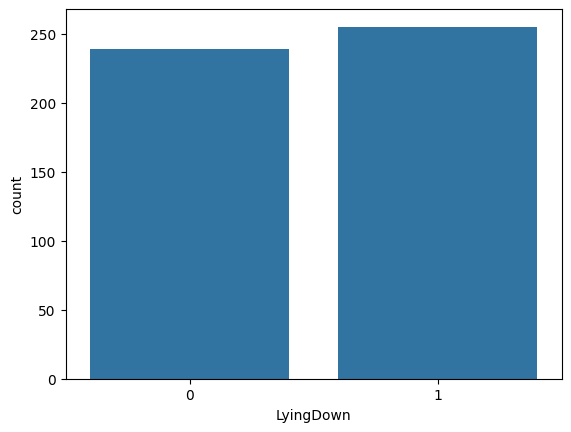

In [41]:
sns.countplot(x='LyingDown', data=activity)

From the plot, it's clear that class `1` occurs slightly more frequently than class `0`. This visually confirms the **slight class imbalance** observed earlier in the `value_counts()` output and explains why the median of the `LyingDown` variable is `1`. Although the imbalance is minimal, it's still useful to keep in mind during model evaluation.

To visualize the distribution of the `Acc (vertical)` feature, I used a boxplot:

<Axes: ylabel='Acc (vertical)'>

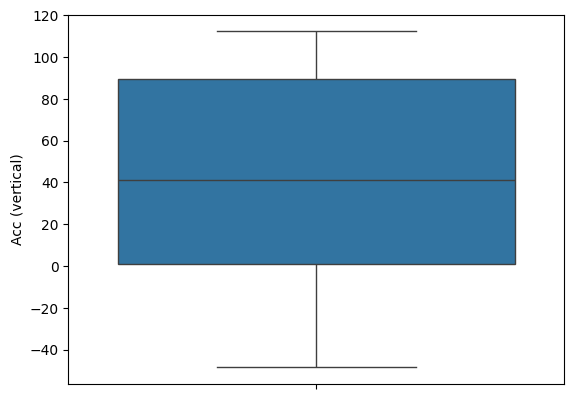

In [42]:
sns.boxplot(y=activity['Acc (vertical)'])

This boxplot summarizes the overall distribution of vertical acceleration (`Acc (vertical)`) across all observations. 

- The median vertical acceleration is slightly above 40.  
- The interquartile range (IQR) spans from ~0 to ~89, covering the middle 50% of the data.  
- Values range from approximately -45 to 112, showing a broad spread.  
- The distribution appears slightly left-skewed, with a longer lower whisker.  
- No extreme outliers are observed beyond the whiskers.  
- This overall distribution indicates high variability in vertical acceleration.

This distribution suggests notable variability in vertical acceleration, prompting further class-specific analysis. To investigate potential outliers and understand how the distribution of `Acc (vertical)` varies between classes, I used the following plot:

<Axes: xlabel='LyingDown', ylabel='Acc (vertical)'>

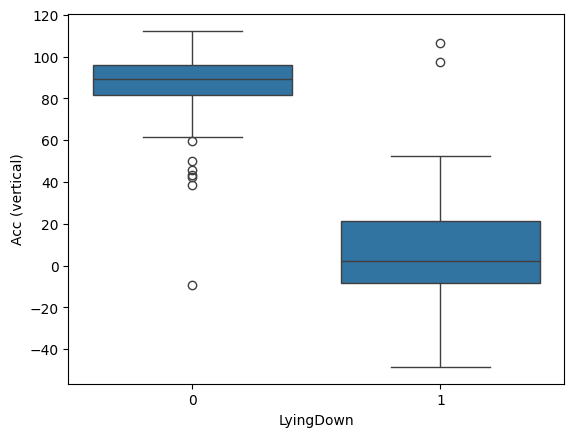

In [43]:
sns.boxplot(x='LyingDown', y='Acc (vertical)', data=activity)


This plot reveals important insights that were not visible in the overall distribution:

- **Class 0 (`LyingDown = 0`)** shows consistently high vertical acceleration values, with a median near 90. However, several lower outliers are visible, indicating occasional drops in acceleration.
- **Class 1 (`LyingDown = 1`)** exhibits much lower vertical acceleration overall, with a median close to zero and a wider spread toward negative values. A few high outliers suggest instances of unexpected high vertical movement.

This contrast illustrates that **outlier behavior is class-dependent**. While the overall distribution did not show outliers, breaking it down by class reveals distinct subgroup patterns. These outliers, though not extreme at the dataset level, are unusual within their respective classes.

Such differences reinforce the importance of **stratified analysis**, especially in classification tasks, where class-specific variability can directly impact model performance and interpretation.

After identifying the presence of class-specific outliers visually using a boxplot, I proceed to isolate and inspect these outliers numerically. For the `LyingDown = 0` group, I calculate the IQR and apply the standard outlier detection formula:

In [44]:
lying_0 = activity[activity['LyingDown'] == 0]

Q1_0 = lying_0['Acc (vertical)'].quantile(0.25)
Q3_0 = lying_0['Acc (vertical)'].quantile(0.75)
IQR_0 = Q3_0 - Q1_0

lower_bound_0 = Q1_0 - 1.5 * IQR_0
upper_bound_0 = Q3_0 + 1.5 * IQR_0

outliers_0 = lying_0[
    (lying_0['Acc (vertical)'] < lower_bound_0) | 
    (lying_0['Acc (vertical)'] > upper_bound_0)
]

outliers_0.reset_index(drop=True, inplace=True)

outliers_0

,Acc (vertical),LyingDown
0,45.7030,0
1,43.4060,0
2,38.8130,0
3,-9.4162,0
4,50.2960,0
5,59.4830,0
6,42.2580,0


Among the vertical acceleration readings, I observed a notably **low value of -9.4162** while the individual was not lying down. This negative acceleration could arise from **several plausible causes**:

- **Physical movement**: It may reflect a **downward motion**, such as bending, dropping to a seat, or transitioning into a lower posture — all of which produce negative acceleration if the sensor axis defines "up" as positive.
- **Sensor orientation**: If the device was tilted or worn in a non-standard position, the direction of the vertical axis might have shifted, resulting in a downward movement being registered as negative.
- **Device limitations**: Alternatively, this could be a case of **sensor noise, drift, or calibration error** — especially if it's an isolated spike rather than part of a consistent pattern.

Since the value appears extreme relative to its surrounding points but is still within physical bounds, I cannot immediately dismiss it as error. This observation highlights the importance of **considering both signal context and sensor integrity** when interpreting outlier measurements.

Then I proceed to isolate and inspect these outliers numerically. For the `LyingDown = 1` group, I calculate the IQR and apply the standard outlier detection formula.

In [45]:
lying_1 = activity[activity['LyingDown'] == 1]

Q1_1 = lying_1['Acc (vertical)'].quantile(0.25)
Q3_1 = lying_1['Acc (vertical)'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

lower_bound_1 = Q1_1 - 1.5 * IQR_1
upper_bound_1 = Q3_1 + 1.5 * IQR_1

outliers_1 = lying_1[
    (lying_1['Acc (vertical)'] < lower_bound_1) | 
    (lying_1['Acc (vertical)'] > upper_bound_1)
]

outliers_1.reset_index(drop=True, inplace=True)

outliers_1

,Acc (vertical),LyingDown
0,106.560,1
1,97.377,1


Among the vertical acceleration readings, I noticed a **very high value of 106.56** while the individual was classified as lying down (`LyingDown = 1`). This unusually high value could point to several potential explanations:

- **Sudden movement while lying**: The person might have made a quick motion — such as **jerking, rolling, or raising the torso** — causing a brief acceleration spike.
- **External impact**: If the device was on a surface (e.g., bed), a **jolt or vibration** could produce a sharp reading without actual movement.
- **Fall ending in lying position**: The spike might reflect a **fall**, with the **impact causing high acceleration** and the final posture being misclassified as lying.
- **Sensor noise or misclassification**: The value could be due to **sensor error** or **labeling issues**, especially during fast transitions or awkward postures.

While the reading is **extreme**, it remains physically possible. This highlights the need to **consider signal context and classification boundaries** when interpreting such values.

To visualize the distribution of the `Acc (vertical)` feature, I used a histogram:  

<Axes: xlabel='Acc (vertical)', ylabel='Count'>

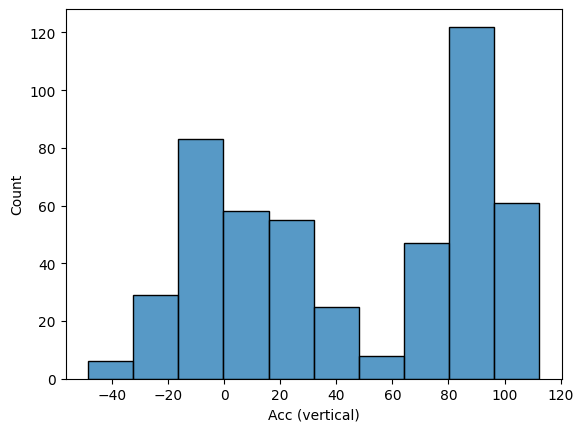

In [46]:
sns.histplot(data=activity['Acc (vertical)'])

The histogram of vertical acceleration (`Acc (vertical)`) reveals a **bimodal distribution**, indicating the presence of **two distinct patterns of physical activity** in the dataset. This is consistent with the binary nature of the `LyingDown` variable, where one peak likely reflects individuals who are **not lying down** (e.g., standing or moving), and the other corresponds to those who **are lying down** (e.g., resting or stationary). The separation between these two modes suggests that vertical acceleration is a meaningful predictor of body posture, with each mode representing a distinct physical state that contributes differently to the overall distribution.

### Building the Binomial Logistic Regression Model

#### **Feature Selection and Splitting**

To prepare the data for binomial logistic regression, I first assign the predictor and outcome variables to `X` and `y`, respectively. Specifically, I extract the `"Acc (vertical)"` column as the independent variable (`X`) and the `"LyingDown"` column as the dependent variable (`y`). I use double square brackets to ensure both are treated as DataFrame objects, which is preferred for compatibility with `scikit-learn`.

In [47]:
X = activity[["Acc (vertical)"]]
y = activity[["LyingDown"]]

Next, I split the dataset into training and holdout sets using the `train_test_split()` function from `scikit-learn`. I set the `test_size` to `0.3`, meaning 30% of the data is reserved for validation, and the remaining 70% is used for training. To ensure reproducibility of results, I set the `random_state` to `42`.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Checking Logistic Regression Assumptions

When working with **simple binomial logistic regression**—that is, a model with **one continuous predictor** and **one binary outcome**—the assumptions are generally less complex than those for multiple logistic regression. However, it's still important to check a few key assumptions to ensure the validity of the model. These include:

1. **Binary outcome variable**  
2. **Independence of observations**  
3. **Linearity of the logit**  
4. **No (or minimal) multicollinearity** *(only applies in multiple logistic regression)*  
5. **No extreme outliers**  
6. **Reasonable sample size / balance between classes**  

#### **Binary outcome variable**  

The dependent variable should be binary—for example, `0 = not lying down` and `1 = lying down`. In this dataset, the `LyingDown` variable meets this requirement, so there are no issues with this assumption.

#### **Independence of observations**  

This assumption requires that each observation in the dataset is independent of the others. In this dataset, each row represents a unique observation of physical activity. However, if multiple observations came from the same person over time (e.g., repeated measurements or time-series data), that could introduce **dependence**, especially if there are **groupings or temporal patterns** in vertical acceleration. In such cases, techniques like **mixed-effects models** or **time-series methods** might be more appropriate. For now, assuming each row comes from a different individual, this assumption appears reasonable.

#### **Linearity of the logit**  

To visually assess the linearity of the logit for the continuous predictor, I plotted the **log odds of `LyingDown`** against the **mean binned values of `Acc (vertical)`** using a line plot:

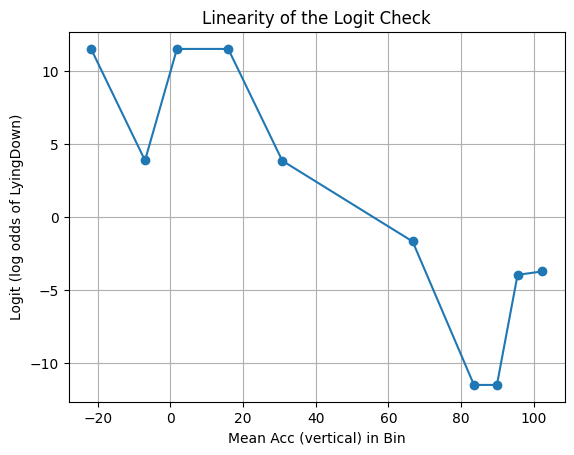

In [49]:
df = activity.copy()
df['Acc_bin'] = pd.qcut(df['Acc (vertical)'], q=10, duplicates='drop')

binned = df.groupby('Acc_bin', observed=False).agg({
    'Acc (vertical)': 'mean',
    'LyingDown': 'mean'
})

binned['logit'] = np.log((binned['LyingDown'] + 1e-5) / (1 - binned['LyingDown'] + 1e-5))

plt.plot(binned['Acc (vertical)'], binned['logit'], marker='o')
plt.xlabel('Mean Acc (vertical) in Bin')
plt.ylabel('Logit (log odds of LyingDown)')
plt.title('Linearity of the Logit Check')
plt.grid(True)
plt.show()

The line plot of log odds versus binned `Acc (vertical)` values shows a **generally decreasing trend**, which supports the **linearity of the logit** assumption. While the overall relationship appears **monotonic and roughly linear**, there are **minor deviations**—notably a sharp drop around the 70–90 range followed by a slight increase. These fluctuations suggest **mild non-linearity** in specific regions, but the pattern does not indicate strong curvature or erratic shifts.

Given this, I conclude that the linearity assumption **mostly holds**. While a transformation of the predictor (e.g., polynomial or log transformation) could help smooth out these non-linear areas, the current trend is sufficiently linear for modeling purposes—so I’m comfortable proceeding without adjustments.

#### **No (or minimal) multicollinearity** *(only applies in multiple logistic regression)*  

Since this is a **simple logistic regression** model with only **one predictor**, multicollinearity is not a concern here, and no check is required.

#### **No extreme outliers**  

While a few outliers were identified in earlier exploratory steps, they appear to be **natural occurrences** rather than data entry errors or anomalies. Given the context of vertical acceleration, such values may reflect genuine variation in physical activity. Therefore, I choose to **retain them in the model**, as they are likely representative of real behavior rather than noise.

#### **Reasonable sample size / balance between classes**  

This condition is met — the dataset contains **494 observations**, which is a reasonable sample size for simple logistic regression. In an earlier step, I confirmed that the target variable is **fairly balanced**, with a slight majority of observations labeled as `LyingDown = 1` (approximately **51.6%**). This slight imbalance is not severe and should not significantly affect model performance.

All of the key assumptions for simple binomial logistic regression appear to be satisfied. The outcome variable is binary, the observations are reasonably independent, and the relationship between the predictor and the log odds is mostly linear with only mild deviations. While a few natural outliers exist, they reflect real-world variability and are retained. Additionally, the dataset has an adequate sample size and a fairly balanced target variable. With these checks complete, I am now ready to proceed with constructing the logistic regression model.

### Model Construction

I build the logistic regression classifier by initializing an instance of `LogisticRegression()` from the `scikit-learn` library. Then, I fit the model to the training data using the `.fit()` method, which trains the model to learn the relationship between vertical acceleration (`X_train`) and lying down status (`y_train`).

I use `.squeeze()` on `y_train` to convert it from a DataFrame to a Series, which is the expected input format for the model.

In [50]:
clf = LogisticRegression().fit(X_train, y_train.squeeze())

The trained model is stored in the variable `clf`, which I will later use for making predictions and evaluating performance.

### Interpreting Model Coefficients

I retrieve the coefficient of the logistic regression model using the `.coef_` attribute:

In [51]:
clf.coef_

array([[-0.1177471]])

This returns the estimated $\beta_1$ coefficient of **-0.118** (rounded), which represents the change in **log odds** of the outcome (lying down) for each one-unit increase in vertical acceleration. Because the coefficient is negative, it suggests that as vertical acceleration increases, the log odds—and thus the likelihood—of someone lying down **decreases**. To interpret this in terms of **odds**, I exponentiate the coefficient:  
  

$\exp(-0.118) \approx 0.89$
  
This means that for every one-unit increase in vertical acceleration, the **odds** of a person lying down decrease by approximately **11%**.

I also extract the intercept of the model using the `.intercept_` attribute:

In [52]:
clf.intercept_

array([6.10180958])

This returns the estimated $\beta_0$ value of **6.10**, which represents the **baseline log odds** of a person lying down when vertical acceleration is zero. This intercept helps position the logistic curve appropriately on the y-axis to best fit the data. To convert this to **odds**, I exponentiate the intercept:


$\exp(6.10) \approx 447.49$


This means that, in the absence of vertical acceleration (i.e., acceleration = 0), the **odds** of someone lying down are extremely high—further supporting the idea that minimal movement is strongly associated with lying down behavior.

#### Confidence Intervals for Logistic Regression Coefficients

Beyond interpreting the point estimate of a coefficient, it's important to consider the **p-values** and **confidence intervals**, which help assess the statistical significance and precision of the estimates. While `scikit-learn` does not provide built-in methods for obtaining p-values or confidence intervals, the `statsmodels` library offers this functionality. This highlights how different tools can complement each other—`scikit-learn` is often used for prediction and evaluation, while `statsmodels` is valuable for inference and diagnostics.

Below is the code I used to fit a logistic regression model using `statsmodels.Logit()` and compute the 95% confidence intervals for the model coefficients:


In [ ]:
X_train_sm = sm.add_constant(X_train) 
model = sm.Logit(y_train, X_train_sm)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.095258
         Iterations 9
                Coefficient  Lower 95%  Upper 95%
const              6.103108   4.445910   7.760305
Acc (vertical)    -0.117772  -0.146436  -0.089108


In [67]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              LyingDown   No. Observations:                  345
Model:                          Logit   Df Residuals:                      343
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Apr 2025   Pseudo R-squ.:                  0.8625
Time:                        12:52:55   Log-Likelihood:                -32.864
converged:                       True   LL-Null:                       -238.96
Covariance Type:            nonrobust   LLR p-value:                 1.221e-91
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.1031      0.846      7.218      0.000       4.446       7.760
Acc (vertical)    -0.1178      0.015     -8.053      0.000      -0.146      -0.089


In [ ]:
conf_int = result.conf_int()
conf_int.columns = ['Lower 95%', 'Upper 95%']
conf_int['Coefficient'] = result.params
conf_int = conf_int[['Coefficient', 'Lower 95%', 'Upper 95%']]
print(conf_int)

This output provides valuable information about the **precision and reliability** of each coefficient estimate in the logistic regression model:

- The coefficient for **`Acc (vertical)`** is **-0.118**, with a 95% confidence interval between **-0.146 and -0.089**. Since the entire interval is negative and does not include zero, this reinforces that vertical acceleration has a **statistically significant negative association** with the likelihood of someone lying down. In other words, as vertical acceleration increases, the odds of lying down decrease—this effect is both meaningful and statistically reliable.

- The **intercept (`const`)** has a coefficient of **6.10**, with a 95% confidence interval ranging from **4.45 to 7.76**. This indicates that, when vertical acceleration is zero, the **log odds** of someone lying down are significantly greater than zero and estimated with a high degree of certainty.

The narrow confidence intervals further suggest that the estimates are precise and not the result of random variation, supporting the robustness of the model.

### Model Visualization  

To visualize the model, I use `seaborn`'s `regplot()` function:

<Axes: xlabel='Acc (vertical)', ylabel='LyingDown'>

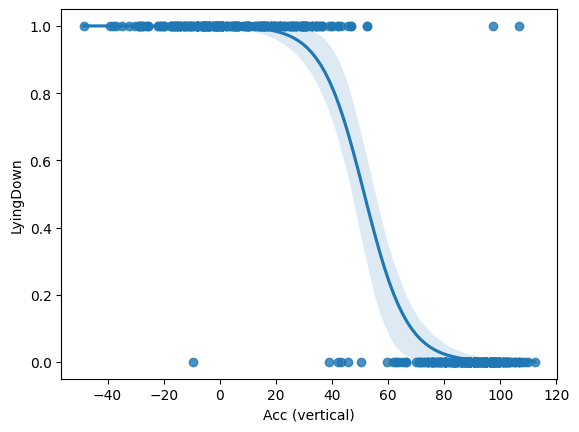

In [54]:
sns.regplot(x="Acc (vertical)", y="LyingDown", data=activity, logistic=True)

By setting `logistic=True`, I specify that I want to fit and plot a **logistic regression curve** rather than a linear one. This plot shows the predicted probability of lying down as a function of vertical acceleration, along with a **95% confidence band**, allowing me to interpret how well the model fits the observed data and how prediction certainty changes across values of vertical acceleration.

From the plot, I can see that as vertical acceleration increases, the probability of lying down **decreases sharply**. This reflects the negative coefficient from my model. Most instances where a person is lying down are associated with **lower vertical acceleration**, while higher acceleration values are almost always associated with **not lying down**. The confidence band is narrower in regions with more data and wider where data is sparse, which helps indicate how confident the model is in its predictions at different acceleration levels.

### Evaluating the Model: Confusion Matrix

Now I focus on **confusion matrices**, which I use to evaluate the performance of my classification model—in this case, the binomial logistic regression model I built to predict whether a person is lying down based on vertical acceleration.

#### Generating Predictions 
 
Next, I generate label predictions for the holdout set by applying the trained logistic regression model to the test features. I store the results in the variable `y_pred`:

In [55]:
y_pred = clf.predict(X_test)

This returns the **predicted class labels** (0 or 1) for each observation in the holdout sample based on the fitted model. These predictions will be used to evaluate model performance in the next steps.

I also use the `.predict()` method directly on `X_test` to view the classification outcomes:

In [56]:
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

This returns a list of **predicted labels**, where `0` represents **not lying down** and `1` represents **lying down**, based on the model’s classification threshold (by default, 0.5).

However, logistic regression models don't just output a class label—they calculate the **probability** that a given observation belongs to class `1` (lying down). I can access these predicted probabilities using:

In [57]:
clf.predict_proba(X_test)

array([[9.76830914e-01, 2.31690858e-02],
       [2.48835691e-03, 9.97511643e-01],
       [9.89571940e-01, 1.04280601e-02],
       [9.98943302e-01, 1.05669826e-03],
       [2.18734630e-04, 9.99781265e-01],
       [9.89571940e-01, 1.04280601e-02],
       [9.95339911e-01, 4.66008916e-03],
       [4.26601781e-03, 9.95733982e-01],
       [2.76555093e-02, 9.72344491e-01],
       [9.76830914e-01, 2.31690858e-02],
       [2.17434439e-03, 9.97825656e-01],
       [9.86378959e-01, 1.36210414e-02],
       [9.65638604e-01, 3.43613958e-02],
       [4.26601781e-03, 9.95733982e-01],
       [1.10710279e-03, 9.98892897e-01],
       [9.42407396e-01, 5.75926041e-02],
       [5.22700289e-01, 4.77299711e-01],
       [9.93902149e-01, 6.09785081e-03],
       [1.26718161e-03, 9.98732818e-01],
       [7.30419716e-03, 9.92695803e-01],
       [9.60859944e-01, 3.91400562e-02],
       [6.82863097e-02, 9.31713690e-01],
       [3.59359305e-02, 9.64064069e-01],
       [9.84436385e-01, 1.55636152e-02],
       [1.629131

This returns an array where each row contains two values:
- The probability of class `0` (not lying down)  
- The probability of class `1` (lying down)

For example, a row like `[0.18, 0.82]` means the model estimates an **82% probability** that the person is lying down, and an **18% probability** that they are not.

If I only want the probability of lying down (class `1`), I can extract just the second column using:

In [58]:
clf.predict_proba(X_test)[::,-1]

array([2.31690858e-02, 9.97511643e-01, 1.04280601e-02, 1.05669826e-03,
       9.99781265e-01, 1.04280601e-02, 4.66008916e-03, 9.95733982e-01,
       9.72344491e-01, 2.31690858e-02, 9.97825656e-01, 1.36210414e-02,
       3.43613958e-02, 9.95733982e-01, 9.98892897e-01, 5.75926041e-02,
       4.77299711e-01, 6.09785081e-03, 9.98732818e-01, 9.92695803e-01,
       3.91400562e-02, 9.31713690e-01, 9.64064069e-01, 1.55636152e-02,
       9.83708684e-01, 1.19193813e-02, 7.55109695e-01, 8.74058541e-01,
       3.43613958e-02, 9.91646480e-01, 1.77761812e-02, 1.19193813e-02,
       9.97152398e-01, 2.64338338e-02, 9.98892897e-01, 1.19193813e-02,
       9.31713690e-01, 9.95119380e-01, 9.00936838e-01, 9.22595259e-01,
       8.39842140e-02, 9.99624404e-01, 1.19193813e-02, 8.01630725e-01,
       5.33097419e-03, 1.36210414e-02, 3.01444198e-02, 3.55969345e-03,
       4.07280935e-03, 1.19193813e-02, 9.98892897e-01, 6.53832873e-02,
       4.07280935e-03, 9.98892897e-01, 9.12054235e-03, 9.53423143e-01,
      

This returns a one-dimensional array containing the predicted **probabilities of class `1`** for each observation in the holdout set. These probabilities can later be used for ROC analysis or to adjust the classification threshold based on the application context.

### Creating the Confusion Matrix  

#### **Evaluating Model Performance with a Confusion Matrix**

To evaluate how well the logistic regression model performs, I use a **confusion matrix**, which summarizes the model’s classification results by comparing actual labels against predicted ones.

I generate the confusion matrix using the `confusion_matrix()` function from the `metrics` module in `scikit-learn`, passing in:

- `y_test`: the actual class labels from the holdout sample  
- `y_pred`: the predicted class labels generated by the model  
- `clf.classes_`: the class labels in the model, which are `[0, 1]` for a binary classification problem  

In [59]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)

After computing the confusion matrix, I visualize it using `ConfusionMatrixDisplay` from `sklearn.metrics`:

In [60]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)


To interpret the numbers in the confusion matrix, it's important to keep the following in mind:

- **Top-left (True Negatives)**: The number of people **not lying down** that the model **correctly predicted** as not lying down  
- **Bottom-left (False Negatives)**: The number of people **lying down** that the model **incorrectly predicted** as not lying down  
- **Top-right (False Positives)**: The number of people **not lying down** that the model **incorrectly predicted** as lying down  
- **Bottom-right (True Positives)**: The number of people **lying down** that the model **correctly predicted** as lying down  

These four values define the core classification outcomes:

- **True Negatives (TN):** Accurate prediction of class 0 (not lying down)  
- **False Negatives (FN):** Missed detection of class 1 (lying down)  
- **False Positives (FP):** Incorrect identification of lying down  
- **True Positives (TP):** Correct detection of lying down  

A perfect model would classify all observations correctly—yielding only true positives and true negatives, with zero false positives or false negatives.

To evaluate the performance of my logistic regression model, I visualize a **confusion matrix** using `disp.plot()`. This matrix compares the **true labels** against the **predicted labels** for the holdout dataset.

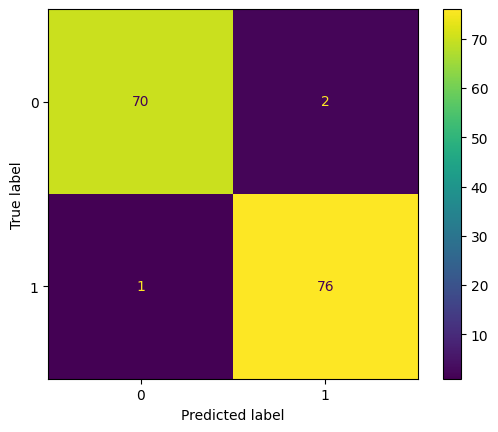

In [61]:
disp.plot()

The axes represent:

- **True labels** (actual values from the dataset)
- **Predicted labels** (generated by the model)

Each cell in the matrix indicates the number of predictions that fall into a particular category:

|                      | **Predicted: 0**         | **Predicted: 1**         |
|----------------------|--------------------------|--------------------------|
| **Actual: 0** (Not lying down) | **True Negatives (TN)**: 70  | **False Positives (FP)**: 2  |
| **Actual: 1** (Lying down)     | **False Negatives (FN)**: 1  | **True Positives (TP)**: 76  |

#### Interpretation

- **True Negatives (70)**: The model correctly predicted that the person was *not lying down*.
- **False Positives (2)**: The model incorrectly predicted that the person *was lying down* when they were not.
- **False Negatives (1)**: The model incorrectly predicted that the person *was not lying down* when they actually were.
- **True Positives (76)**: The model correctly predicted that the person *was lying down*.

#### Observation

In this case, the model performs very well:
- **High number of true positives and true negatives** indicates that the model is accurately identifying both lying down and not lying down states.
- **Low number of false positives and false negatives** means the model rarely misclassifies observations.

This kind of strong performance is especially valuable in contexts like activity recognition or healthcare monitoring, where misclassification could lead to missing critical events (like falls or inactivity in vulnerable individuals).

The confusion matrix is a valuable tool for diagnosing classification models. It helps me go beyond a simple accuracy score to understand *how* my model is getting things right—or wrong.

### Key Classification Metrics

As a data practitioner, I choose evaluation metrics based on the specific priorities of the project. When presenting classification results, I find it helpful to include a **confusion matrix** and key statistics such as **precision**, **recall**, **accuracy**, **ROC curves**, and **AUC scores**.

However, I understand that depending on the context or use case, certain metrics may take precedence. For example, in health monitoring applications like fall detection, **recall** (sensitivity) might be prioritized to reduce false negatives, whereas in other domains, **precision** or **overall accuracy** might be more critical.

I also recognize that different industries or teams may follow their own standards or preferred metrics when evaluating model performance. That’s why it’s important for me to align with stakeholders early in the modeling process to ensure that the evaluation approach reflects both business needs and technical goals.

#### Precision  

**Precision** is calculated as the number of true positives divided by the sum of true positives and false positives. It tells me how many of the people the model predicted to be lying down **actually were** lying down.  

In this context, **precision** answers the question: *Among the individuals my model predicted to be lying down, how many truly were?*  

It reflects the **proportion of positive predictions that are correct**, and is particularly valuable when minimizing **false positives** is important—such as avoiding unnecessary alerts or interventions. High precision means I can have more confidence in the model's positive classifications.

In [62]:
metrics.precision_score(y_test, y_pred)

0.9743589743589743

#### Recall  

**Recall** is the number of true positives divided by the sum of true positives and false negatives. In other words, it measures how well the model captures actual instances of people lying down.

Remember, **false negatives** are people who were actually lying down but were **not** identified as such by the model.

So, **recall** tells me the **proportion of actual positives that are correctly predicted** — that is, out of all the people who were truly lying down, how many the model correctly flagged. This metric is especially important when missing positive cases (i.e., failing to detect someone lying down) carries a higher risk or cost.

In [63]:
metrics.recall_score(y_test, y_pred)

0.987012987012987

#### Accuracy  

Lastly, I consider **accuracy**, which measures the **overall proportion of correct predictions** made by the model. It is calculated as the sum of true positives and true negatives divided by the total number of predictions.

In the context of this activity classification problem, **accuracy** reflects how well the model correctly identifies both people who are lying down and those who are not. It gives me a broad view of performance, showing the proportion of people the model classified correctly—regardless of class. However, accuracy alone may be misleading in imbalanced datasets, so it’s important to interpret it alongside precision and recall.

In [64]:
metrics.accuracy_score(y_test, y_pred)

0.9798657718120806

### ROC Curve and AUC

As the classification threshold decreases, the **true positive rate** increases because the model predicts more observations as positive. However, this also leads to an increase in the **false positive rate**. Since both rates vary with the threshold, I can use an **ROC (Receiver Operating Characteristic) curve** to visualize how these two rates change together.

In an ideal model, there would be a threshold where the true positive rate is high while the false positive rate remains low. The ROC curve helps me assess how well the model balances this trade-off across all possible thresholds.

#### **ROC Curve (Receiver Operating Characteristic)**
I visualize the relationship between the true positive rate and the false positive rate across different classification thresholds:

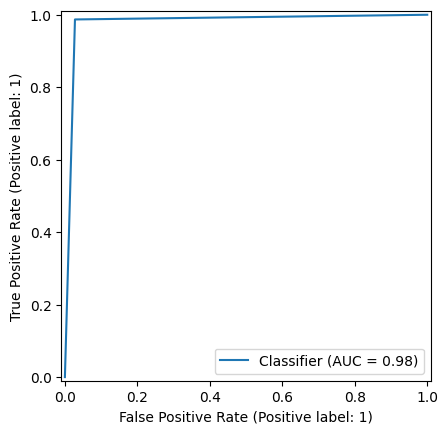

In [65]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

#### **Interpretation of the ROC Curve**

The ROC (Receiver Operating Characteristic) curve shown in the plot illustrates the performance of the classifier at various threshold settings. The **x-axis** represents the **false positive rate** (FPR), while the **y-axis** represents the **true positive rate** (TPR), also known as **recall** or **sensitivity**.

#### Observation:
- The curve hugs the **top-left corner** of the plot, which indicates that the model achieves a **high true positive rate** while maintaining a **low false positive rate** across most thresholds.
- The steep ascent and the area under the curve demonstrate that the classifier performs very well in distinguishing between the two classes (lying down vs. not lying down).

#### **AUC (Area Under the Curve)**  
I calculate the **AUC**, a single number that summarizes the model’s performance over all thresholds. A higher AUC indicates better overall classification ability:

In [66]:
metrics.roc_auc_score(y_test, y_pred)

np.float64(0.9796176046176045)

#### **Interpretation of AUC Score**

- The AUC score is approximately **0.98**, which is **very close to 1**.
- This high value indicates that the classifier has **excellent discriminative ability** — meaning it is very effective at separating positive cases (lying down) from negative cases (not lying down).
- In practical terms, an AUC of 0.98 means that **98% of the time**, the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance.

#### Observation:
This ROC curve and AUC score indicate that the model is **highly effective** and **well-calibrated** for this binary classification task, making it a strong candidate for deployment in scenarios where distinguishing between lying down and not lying down is critical, such as fall detection or elderly care monitoring systems.

ROC and AUC are especially helpful when comparing different classification models, as they provide a comprehensive picture of model performance.

## Final Remarks

I now understand how to:
- Build a **binomial logistic regression model**
- Interpret **coefficients** in terms of **odds ratios**
- Evaluate performance using **confusion matrix**, **precision**, **recall**, **accuracy**, **ROC curves**, and **AUC**

These tools allow me to communicate how well a classification model performs and where improvements may be needed, especially in contexts like healthcare, where prediction of physical states (e.g., lying down or not) can be critical in real-time monitoring and decision-making.